# Predicción del precio de las casas con regresión lineal SIMPLE

### Pasos de este estudio
1. Carga de datos
1. Desarrollo

# 1. Carga de datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
# #Uso de numpy
a = np.arange(0,5)
b = np.arange(1,10,4)
c = np.zeros(5)
d = np.ones(5)

e = np.linspace(1, 10, 20)

f = e.size 
g = e.min()
h = e.max()

#i = a+b
j= 3*a
z = np.array( [ [1,2], [2,3], [6,7] ] )

z>2

array([[False, False],
       [False,  True],
       [ True,  True]])

In [95]:
# lectura de datos en Python

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [100]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. Desarrollo

In [102]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [175]:
train[['GarageArea','SalePrice']].head(10)  #Superficie habitable por encima del nivel del suelo en pies cuadrados
                                            #Precio de venta

,GarageArea,SalePrice
0,548,208500
1,460,181500
2,608,223500
3,642,140000
4,836,250000
5,480,143000
6,636,307000
7,484,200000
8,468,129900
9,205,118000


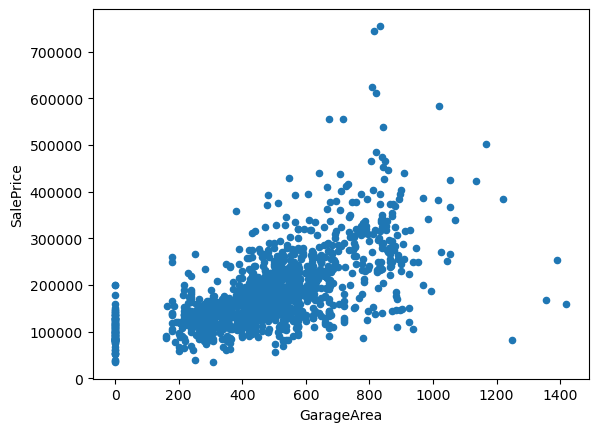

In [176]:
train.plot.scatter(x='GarageArea',y='SalePrice')
plt.show()

In [9]:
# pintando una línea recta sobre los datos
# y = wx + b

In [10]:
print(train['GrLivArea'].min())
print(train['GrLivArea'].max())

334
5642


In [167]:
# parametros de la recta
w = 118 #m
b = 0

# y = wx + b

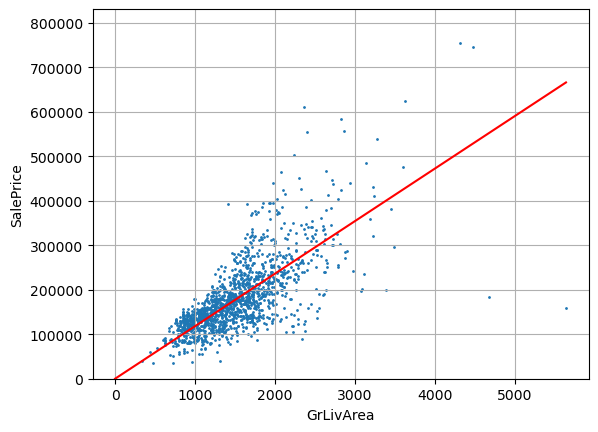

In [168]:
# puntos de la recta
x = np.linspace(0,train['GrLivArea'].max())
y = w*x+b

# grafica de la recta
train.plot.scatter(x='GrLivArea',y='SalePrice',s=1) #nombre de los ejes
plt.plot(x, y, '-r')
plt.ylim(0,train['SalePrice'].max()*1.1) #ajuste del eje y
plt.grid()
plt.show()


In [141]:
# si escogemos esos parametros para el modelo, ¿cual es el error?

In [169]:
# calculo de las predicciones
train['pred'] = train['GrLivArea']*w+b   #y=wx+b
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pred,diff,cuad
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,201780,133500.0,1.782225e+10
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,148916,70900.0,5.026810e+09
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,210748,133700.0,1.787569e+10
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,202606,203400.0,4.137156e+10
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,259364,189600.0,3.594816e+10


In [170]:
# calculo de la funcion de error
train['diff'] = train['pred']-train['SalePrice'] #diferencia de las predicciones y valor real del eje y
train['cuad'] = train['diff']**2
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pred,diff,cuad
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,201780,-6720,45158400
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,148916,-32584,1061717056
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,210748,-12752,162613504
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,202606,62606,3919511236
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,259364,9364,87684496


In [171]:
#Error cuadrático medio
train['cuad'].mean()

3176840556.8534245

In [3]:
# grid de la funcion de error basado en m, b=0
# q = np.linspace(1,100,10);
w = np.linspace(50,200,50)
grid_error = pd.DataFrame(w, columns=['w'])
grid_error

,w
0,50.000000
1,53.061224
2,56.122449
3,59.183673
4,62.244898
5,65.306122
6,68.367347
7,71.428571
8,74.489796
9,77.551020


In [173]:
def sum_error(w, train):
    b=0
    train['pred'] = train['GrLivArea']*w+b
    train['diff'] = train['pred']-train['SalePrice']
    train['cuad'] = train['diff']**2
    return(train['cuad'].mean())
train['cuad'].mean()


3176840556.8534245

In [174]:
# a cada w se le asigna su error cuadrático medio. Es como si se ejecutara lo de arriba pero para distintas w.
grid_error['error'] = grid_error['w'].apply(lambda x: sum_error(x, train=train))
#grid_error['error'].min()
#grid_error['error']
#grid_error['w']

grid_error_menor = pd.DataFrame()
grid_error_menor['menorW'] = [ grid_error['w'] [grid_error['error'].argmin()]]
errorMinimo = float(grid_error_menor['menorW'])
errorMinimo

117.3469387755102

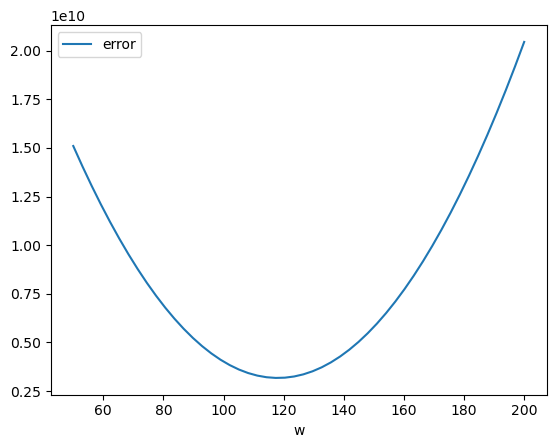

In [24]:
grid_error.plot(x='w',y='error')
plt.show()

In [221]:
# usando sklear para saber los valores optimos
from sklearn.linear_model import LinearRegression

# definiendo input y output

X_train = np.array(train['GrLivArea']).reshape((-1, 1)) #Primer variable (entrada)
Y_train = np.array(train['SalePrice'])                  #Segunda variable (salida)

# creando modelo
model = LinearRegression(fit_intercept=False) #la línea de regresión pasa por el origen (0,0).
model.fit(X_train, Y_train)

# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

intercepto (b): 0.0
pendiente (w): [118.06909986]


In [207]:
import numpy as np

# Crear una matriz unidimensional
array_unidimensional = np.array([1, 2, 3, 4, 5, 6])

# Utilizar reshape para convertir la matriz unidimensional en una matriz bidimensional (3 filas x 2 columnas)
array_bidimensional = array_unidimensional.reshape((3, 2))

# Imprimir las matrices originales y la transformada
print("Matriz Unidimensional:")
print(array_unidimensional)
print("\nMatriz Bidimensional:")
print(array_bidimensional)

Matriz Unidimensional:
[1 2 3 4 5 6]

Matriz Bidimensional:
[[1 2]
 [3 4]
 [5 6]]


In [214]:
import numpy as np

# Crear una matriz unidimensional
array_unidimensional = np.array([1, 2, 3, 4, 5, 6])

# Utilizar reshape para convertir la matriz unidimensional en una matriz bidimensional con una columna
array_bidimensional = array_unidimensional.reshape((-1, 1))

# Imprimir las matrices originales y la transformada
print("Matriz Unidimensional:")
print(array_unidimensional)
print("\nMatriz Bidimensional:")
print(arr[ay_bidimensional)


Matriz Unidimensional:
[1 2 3 4 5 6]

Matriz Bidimensional:
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Definir datos de entrenamiento
X_train = np.array(train['GrLivArea']).reshape((-1, 1))  # Variable de entrada
Y_train = np.array(train['SalePrice'])  # Variable de salida

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

# Imprimir parámetros del modelo
print(f"Intercepto (b): {model.intercept_}")
print(f"Pendiente (w): {model.coef_}")

# Realizar predicciones
predictions = model.predict(X_train)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(Y_train, predictions)
print(f"Error Cuadrático Medio (MSE): {mse}")


Intercepto (b): 0.0
Pendiente (w): [118.06909986]
Error Cuadrático Medio (MSE): 3176828273.3656716
